In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pymc3 as pm

%matplotlib inline

In [2]:
from scipy import stats

In [3]:
import random

random.seed(92381)
np.random.seed(92381)

# flipping coins

In [4]:
# flipping coins

coins = stats.bernoulli.rvs(p=0.7, size=1000)

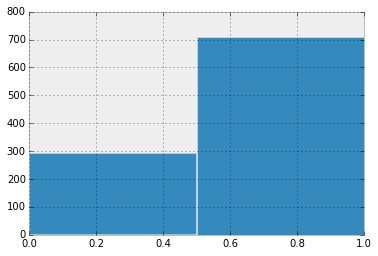

In [5]:
plt.hist(coins, bins=2)
plt.show()

In [6]:
# Trying prior p ~ Uniform(0,1)

with pm.Model() as model:
    p = pm.Uniform('p', 0, 1)
    obs = pm.Bernoulli('obs', p, observed=coins)
    
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace1 = pm.sample(2000, step=step, start=start)

 [-----------------100%-----------------] 2000 of 2000 complete in 1.3 sec

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11565d438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117f475c0>]], dtype=object)

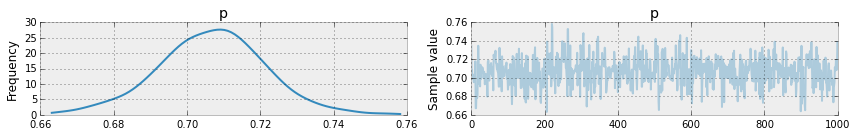

In [7]:
pm.traceplot(trace1[1000:], ['p'])

In [8]:
pm.summary(trace1[1000:], vars=['p'])


p:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.707            0.015            0.001            [0.676, 0.735]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.677          0.697          0.707          0.716          0.735



In [9]:
# Trying prior p ~ Beta(3,3)

with pm.Model() as model:
    p = pm.Beta('p', 3, 3)
    obs = pm.Bernoulli('obs', p, observed=coins)
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace2 = pm.sample(2000, step=step, start=start)

 [-----------------100%-----------------] 2000 of 2000 complete in 0.7 sec

In [10]:
pm.summary(trace2[1000:], vars=['p'])


p:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.706            0.014            0.001            [0.675, 0.731]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.676          0.697          0.706          0.715          0.733



In [ ]:
# Trying prior p ~ Beta(a,b) where a and b ~ Uniform(1, 3)

with pm.Model() as model:
    a = pm.Uniform('a', 1, 3)
    b = pm.Uniform('b', 1, 3)
    p = pm.Beta('p', a, b)
    obs = pm.Bernoulli('obs', p, observed=coins)
    
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace3 = pm.sample(2000, step=step, start=start)

In [ ]:
pm.traceplot(trace3[1000:], ['a', 'b', 'p'])

In [ ]:
pm.summary(trace3[1000:], ['a', 'b', 'p'])

# Random walks

In [12]:
import pandas as pd

In [37]:
# Bernoulli for directions

upOrDown = stats.bernoulli.rvs(p=0.55, size=2000)

In [38]:
# gamma daily returns

ret = stats.gamma.rvs(a=1.9, size=2000, scale=0.01)

(array([ 192.,  340.,  339.,  279.,  248.,  171.,  125.,   75.,   75.,
          48.,   33.,   22.,   18.,   14.,    9.,    4.,    4.,    2.,
           0.,    2.]),
 array([ 0.00026377,  0.00469117,  0.00911857,  0.01354597,  0.01797337,
         0.02240077,  0.02682817,  0.03125557,  0.03568296,  0.04011036,
         0.04453776,  0.04896516,  0.05339256,  0.05781996,  0.06224736,
         0.06667475,  0.07110215,  0.07552955,  0.07995695,  0.08438435,
         0.08881175]),
 <a list of 20 Patch objects>)

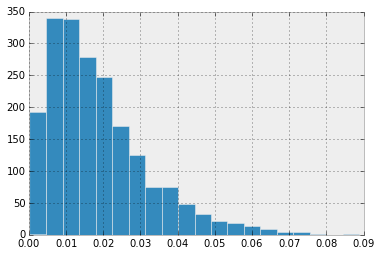

In [39]:
plt.hist(ret, bins=20)

In [40]:
tupl = zip(upOrDown, ret)

In [41]:
res = []
for u,r in tupl:
    res.append((u-1)*r + u*r)

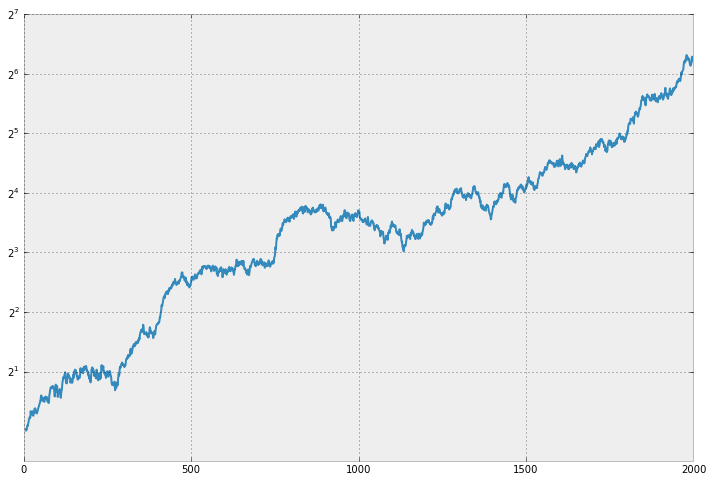

In [42]:
res_ser = pd.Series(res)
res_ser = res_ser + 1
plt.yscale('symlog', basey=2)
res_ser.cumprod().plot(figsize=(12,8))

In [ ]:
res_ser.plot()

In [43]:
model_ran = pm.Model()

with model_ran:
    p = pm.Uniform('p', 0.4, 0.6)
    direction = pm.Bernoulli('dir', p=p)
    ret = pm.Exponential('ret', lam=1) / 100
    
    dret = direction * ret + (direction-1) * ret
    
    start = pm.find_MAP()
    step = pm.NUTS(scaling=start)
    trace_ran = pm.sample(2000, step=step, start=start)

INFO (theano.gof.compilelock): Refreshing lock /Users/semio/.theano/compiledir_Darwin-15.0.0-x86_64-i386-64bit-i386-3.5.0-64/lock_dir/lock
INFO:theano.gof.compilelock:Refreshing lock /Users/semio/.theano/compiledir_Darwin-15.0.0-x86_64-i386-64bit-i386-3.5.0-64/lock_dir/lock


Assigned <class 'pymc3.step_methods.metropolis.BinaryMetropolis'> to dir
 [-----------------100%-----------------] 2000 of 2000 complete in 3.2 sec

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b308208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11bb8d6a0>]], dtype=object)

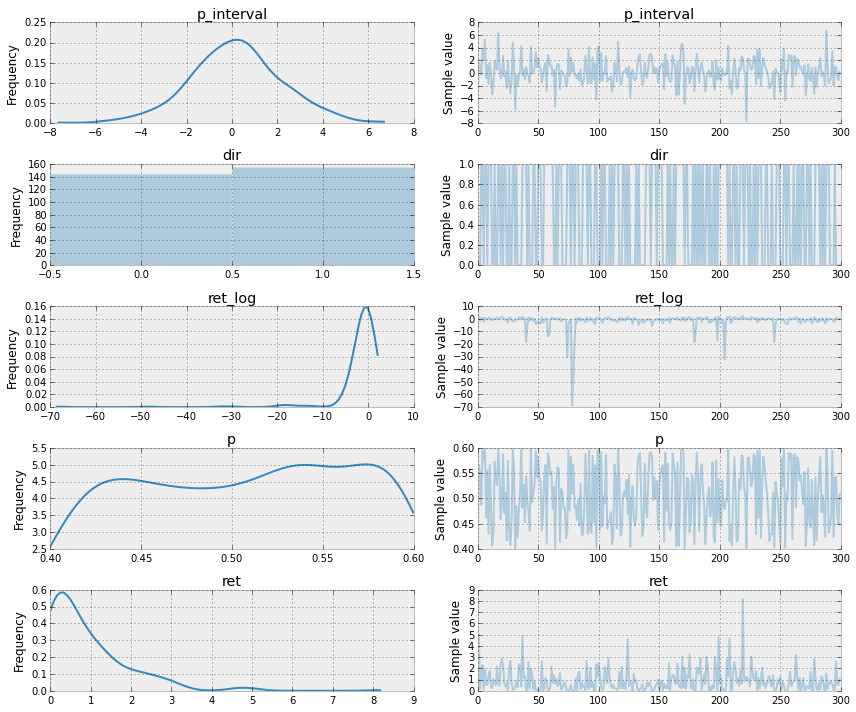

In [45]:
pm.traceplot(trace_ran[500::5])

In [44]:
pm.summary(trace_ran[500::5], ['p'])


p:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.505            0.061            0.003            [0.406, 0.599]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.403          0.451          0.510          0.561          0.597

